In [1]:
# This notebook is used for preprocessing the data

### Importing Libraries
This script imports essential Python libraries for data analysis and visualization. `Pandas` and `NumPy` are used for data manipulation, `h5py` for handling HDF5 files, and `matplotlib` and `seaborn` for plotting. `scipy.stats` provides statistical tools, crucial for insightful data exploration in machine learning projects.

In [2]:
import pandas as pd
import numpy as np
import h5py
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats



### Loading and Reading the Data
The Python script efficiently loads multiple datasets from an HDF5 file, crucial for machine learning in predictive maintenance. It handles development and test sets, including operational settings, sensor readings, and RUL values. This structured data loading approach is vital for analysis and model training in aerospace prognostics.

In [3]:


file_name = '/mnt/e/PdM/DataX/NASA/N-CMAPSS_DS01-005.h5'

# Load data
with h5py.File(file_name, 'r') as hdf:
        # Development set
        W_dev = np.array(hdf.get('W_dev'))             # W
        X_s_dev = np.array(hdf.get('X_s_dev'))         # X_s
        X_v_dev = np.array(hdf.get('X_v_dev'))         # X_v
        T_dev = np.array(hdf.get('T_dev'))             # T
        Y_dev = np.array(hdf.get('Y_dev'))             # RUL  
        A_dev = np.array(hdf.get('A_dev'))             # Auxiliary

        # Test set
        W_test = np.array(hdf.get('W_test'))           # W
        X_s_test = np.array(hdf.get('X_s_test'))       # X_s
        X_v_test = np.array(hdf.get('X_v_test'))       # X_v
        T_test = np.array(hdf.get('T_test'))           # T
        Y_test = np.array(hdf.get('Y_test'))           # RUL  
        A_test = np.array(hdf.get('A_test'))           # Auxiliary
        
        # Varnams
        W_var = np.array(hdf.get('W_var'))
        X_s_var = np.array(hdf.get('X_s_var'))  
        X_v_var = np.array(hdf.get('X_v_var')) 
        T_var = np.array(hdf.get('T_var'))
        A_var = np.array(hdf.get('A_var'))
        
        # from np.array to list dtype U4/U5
        W_var = list(np.array(W_var, dtype='U20'))
        X_s_var = list(np.array(X_s_var, dtype='U20'))  
        X_v_var = list(np.array(X_v_var, dtype='U20')) 
        T_var = list(np.array(T_var, dtype='U20'))
        A_var = list(np.array(A_var, dtype='U20'))


### Building Dataframes
This script converts numpy arrays (`W_dev`, `X_s_dev`, `X_v_dev`, `T_dev`, `Y_dev`, `A_dev`, and their test counterparts) into pandas DataFrames, assigning appropriate column names for each. It's an essential step in organizing and preparing the data for further analysis and machine learning modeling in predictive maintenance.

In [4]:
W_dev_df = pd.DataFrame(W_dev, columns=W_var)
X_s_dev_df = pd.DataFrame(X_s_dev, columns=X_s_var)
X_v_dev_df = pd.DataFrame(X_v_dev, columns=X_v_var)
T_dev_df = pd.DataFrame(T_dev, columns=T_var)
Y_dev_df = pd.DataFrame(Y_dev, columns=['RUL'])
A_dev_df = pd.DataFrame(A_dev, columns=A_var)

W_test_df = pd.DataFrame(W_test, columns=W_var)
X_s_test_df = pd.DataFrame(X_s_test, columns=X_s_var)
X_v_test_df = pd.DataFrame(X_v_test, columns=X_v_var)
T_test_df = pd.DataFrame(T_test, columns=T_var)
Y_test_df = pd.DataFrame(Y_test, columns=['RUL'])
A_test_df = pd.DataFrame(A_test, columns=A_var)


### Creating Development and Test Dataframes
The script merges individual feature sets into comprehensive `train_df` and `test_df`, crucial for developing and evaluating machine learning models in predictive maintenance.

In [25]:
# Concatenate the development datasets to create the training DataFrame
Train_Data = pd.concat([W_dev_df, X_s_dev_df, X_v_dev_df, T_dev_df, A_dev_df, Y_dev_df], axis=1)

# Concatenate the test datasets to create the test DataFrame
Test_Data = pd.concat([W_test_df, X_s_test_df, X_v_test_df, T_test_df, A_test_df, Y_test_df], axis=1)


In [5]:
# Concatenate the development datasets to create the training DataFrame
train_df = pd.concat([W_dev_df, X_s_dev_df, Y_dev_df], axis=1)

# Concatenate the test datasets to create the test DataFrame
test_df = pd.concat([W_test_df, X_s_test_df, Y_test_df], axis=1)


In [27]:
train_df.columns

Index(['alt', 'Mach', 'TRA', 'T2', 'T24', 'T30', 'T48', 'T50', 'P15', 'P2',
       'P21', 'P24', 'Ps30', 'P40', 'P50', 'Nf', 'Nc', 'Wf', 'RUL'],
      dtype='object')

In [28]:
train_df.head()

,alt,Mach,TRA,T2,T24,T30,T48,T50,P15,P2,P21,P24,Ps30,P40,P50,Nf,Nc,Wf,RUL
0,3013.0,0.376362,70.311996,522.314770,618.288596,1470.469798,1849.620676,1269.275585,19.432070,14.484611,19.727990,24.410990,394.701872,401.205188,15.974771,2142.253462,8693.176503,4.621622,99
1,3020.0,0.376866,70.311996,522.327145,618.296355,1470.415593,1849.519871,1269.177159,19.431385,14.484683,19.727295,24.410483,394.629899,401.132851,15.970518,2142.218596,8693.000298,4.620561,99
2,3025.0,0.377685,70.311996,522.371840,618.336514,1470.453853,1849.566139,1269.167353,19.435163,14.488224,19.731130,24.415476,394.667850,401.171401,15.969419,2142.257956,8693.106262,4.621064,99
3,3035.0,0.376992,70.399887,522.282418,618.302173,1470.650929,1850.195069,1269.518670,19.426003,14.477632,19.721830,24.406544,394.773533,401.272707,15.967762,2142.794673,8693.680367,4.624305,99
4,3043.0,0.377622,70.399887,522.300605,618.345228,1470.640421,1849.950988,1269.253972,19.427484,14.478114,19.723334,24.410159,394.732158,401.234620,15.962571,2143.015150,8693.714825,4.622768,99


In [29]:
# Assuming train_df is the DataFrame and it contains the column 'unit'

unit_counts = Train_Data['unit'].value_counts()
unit_counts

unit
5.0    1280147
2.0    1049088
3.0     893054
6.0     836850
1.0     433325
4.0     414172
Name: count, dtype: int64

In [30]:
# Assuming train_df is the DataFrame and it contains the column 'unit'

unit_counts = Test_Data['unit'].value_counts()
unit_counts

unit
10.0    1190670
8.0      800294
7.0      392585
9.0      351683
Name: count, dtype: int64

In [31]:

# Grouping the dataframe by 'unit' and calculating the min and max index for each group
unit_indices = Train_Data.groupby('unit').apply(lambda x: (x.index.min(), x.index.max()))

# Iterating over each unit and its indices, and printing the start and end index for each unit
for unit, indices in unit_indices.items():
    print(f"Unit {unit} starts at row {indices[0]} and ends at row {indices[1]}")


Unit 1.0 starts at row 0 and ends at row 433324
Unit 2.0 starts at row 433325 and ends at row 1482412
Unit 3.0 starts at row 1482413 and ends at row 2375466
Unit 4.0 starts at row 2375467 and ends at row 2789638
Unit 5.0 starts at row 2789639 and ends at row 4069785
Unit 6.0 starts at row 4069786 and ends at row 4906635


In [32]:
# Grouping the dataframe by 'unit' and calculating the min and max index for each group
unit_indices = Test_Data.groupby('unit').apply(lambda x: (x.index.min(), x.index.max()))

# Iterating over each unit and its indices, and printing the start and end index for each unit
for unit, indices in unit_indices.items():
    print(f"Unit {unit} starts at row {indices[0]} and ends at row {indices[1]}")

Unit 7.0 starts at row 0 and ends at row 392584
Unit 8.0 starts at row 392585 and ends at row 1192878
Unit 9.0 starts at row 1192879 and ends at row 1544561
Unit 10.0 starts at row 1544562 and ends at row 2735231


Shape and Size of DataFrames

In [33]:
#### Shape and Size of DataFramesn
print("Train DataFrame Shape:", train_df.shape)
print("Test DataFrame Shape:", test_df.shape)


Train DataFrame Shape: (4906636, 19)
Test DataFrame Shape: (2735232, 19)


Data Types in Each Column

In [34]:
#### Data Types in Each Column

print("Data Types in Train DataFrame:\n", train_df.dtypes)
print("Data Types in Test DataFrame:\n", test_df.dtypes)


Data Types in Train DataFrame:
 alt     float64
Mach    float64
TRA     float64
T2      float64
T24     float64
T30     float64
T48     float64
T50     float64
P15     float64
P2      float64
P21     float64
P24     float64
Ps30    float64
P40     float64
P50     float64
Nf      float64
Nc      float64
Wf      float64
RUL       int64
dtype: object
Data Types in Test DataFrame:
 alt     float64
Mach    float64
TRA     float64
T2      float64
T24     float64
T30     float64
T48     float64
T50     float64
P15     float64
P2      float64
P21     float64
P24     float64
Ps30    float64
P40     float64
P50     float64
Nf      float64
Nc      float64
Wf      float64
RUL       int64
dtype: object


Descriptive Statistics

In [35]:
#### Descriptive Statistics
print("Train DataFrame Statistics:\n", train_df.describe())
print("Test DataFrame Statistics:\n", test_df.describe())


Train DataFrame Statistics:
                 alt          Mach           TRA            T2           T24  \
count  4.906636e+06  4.906636e+06  4.906636e+06  4.906636e+06  4.906636e+06   
mean   1.568371e+04  5.384156e-01  6.059576e+01  4.902042e+02  5.696602e+02   
std    8.007308e+03  1.194006e-01  1.840391e+01  1.960585e+01  2.085329e+01   
min    3.001000e+03  3.150000e-04  2.355452e+01  4.213779e+02  4.841972e+02   
25%    9.206000e+03  4.440240e-01  4.684537e+01  4.744894e+02  5.548824e+02   
50%    1.465400e+04  5.481000e-01  6.539016e+01  4.940213e+02  5.672901e+02   
75%    2.235100e+04  6.383160e-01  7.707953e+01  5.063441e+02  5.831270e+02   
max    3.503300e+04  7.492590e-01  8.876890e+01  5.343834e+02  6.340001e+02   

                T30           T48           T50           P15            P2  \
count  4.906636e+06  4.906636e+06  4.906636e+06  4.906636e+06  4.906636e+06   
mean   1.330678e+03  1.640812e+03  1.129691e+03  1.293220e+01  1.008869e+01   
std    6.813023e+01  1

Checking for Null Values

In [37]:
#### Checking for Null Values

print("Null Values in Train DataFrame:\n", train_df.isnull().sum())
print("Null Values in Test DataFrame:\n", test_df.isnull().sum())


Null Values in Train DataFrame:
 alt     0
Mach    0
TRA     0
T2      0
T24     0
T30     0
T48     0
T50     0
P15     0
P2      0
P21     0
P24     0
Ps30    0
P40     0
P50     0
Nf      0
Nc      0
Wf      0
RUL     0
dtype: int64
Null Values in Test DataFrame:
 alt     0
Mach    0
TRA     0
T2      0
T24     0
T30     0
T48     0
T50     0
P15     0
P2      0
P21     0
P24     0
Ps30    0
P40     0
P50     0
Nf      0
Nc      0
Wf      0
RUL     0
dtype: int64


### Descriptions of the columns in `train_df`, which are crucial for understanding and modeling the dataset:

1. **Altitude (alt):** The altitude at which the aircraft is operating, measured in feet.
2. **Flight Mach number (Mach):** The ratio of the speed of the aircraft to the speed of sound.
3. **Throttle-resolver angle (TRA):** Represents the angle of the throttle, indicating the thrust level.
4. **Total temperature measurements (T2, T24, T30, T48, T50):** Temperatures recorded at various points in the engine, crucial for monitoring engine health.
5. **Total pressure measurements (P15, P2, P21, P24, Ps30, P40, P50):** Pressures measured at different engine stages, essential for engine performance analysis.
6. **Physical and corrected fan and core speeds (Nf, Nc):** Indicate the operational speed of engine components.
7. **Fuel flow (Wf):** The rate of fuel consumption, an important factor in engine efficiency.
8. **Various flow measurements (W21, W22, W25, W31, W32, W48, W50):** Indicate the flow rates at different points in the engine, related to engine efficiency and health.
9. **Stall margins (SmFan, SmLPC, SmHPC):** Indicators of the safety margin before the engine components stall.
10. **Efficiency and flow modifiers (fan_eff_mod, LPC_eff_mod, HPC_eff_mod, etc.):** Reflect changes in component efficiency and flow, linked to engine health.
11. **Remaining Useful Life (RUL):** The target variable, indicating the number of operational cycles remaining before the engine requires maintenance.

These variables collectively provide a comprehensive view of the aircraft engine's operational state and are instrumental in predicting the Remaining Useful Life (RUL), which is the p they goal of your machine laborated upon.

This script calculates and prints the memory usage of `train_df` and `test_df` before and after converting all their columns to `float32`, which is a more memory-efficient data type compared to `float64`.

converting the columns to float32 


In [6]:
# Memory usage before conversion
print("Memory Usage before conversion:")
print("Train DataFrame:", train_df.memory_usage(deep=True).sum())
print("Test DataFrame:", test_df.memory_usage(deep=True).sum())

# Converting all columns to float32
train_df = train_df.astype('float32')
test_df = test_df.astype('float32')

# Memory usage after conversion
print("\nMemory Usage after conversion:")
print("Train DataFrame:", train_df.memory_usage(deep=True).sum())
print("Test DataFrame:", test_df.memory_usage(deep=True).sum())


Memory Usage before conversion:
Train DataFrame: 745808800
Test DataFrame: 415755392

Memory Usage after conversion:
Train DataFrame: 372904464
Test DataFrame: 207877760


### Comprehensive Visualization of Key Aircraft Engine Parameters
The Python scripts create detailed plots for critical engine parameters like temperatures, pressures, speeds, flows, and operational settings from `train_df`, crucial for predictive maintenance modeling insights.

This Python script adeptly plots key aircraft operational parameters—Altitude ('alt'), Flight Mach Number ('Mach'), and Throttle-resolver Angle ('TRA')—from the `train_df` dataset, focusing on the first 20,000 observations. These plots are essential for understanding the aircraft's operational profile, crucial for predictive maintenance modeling.

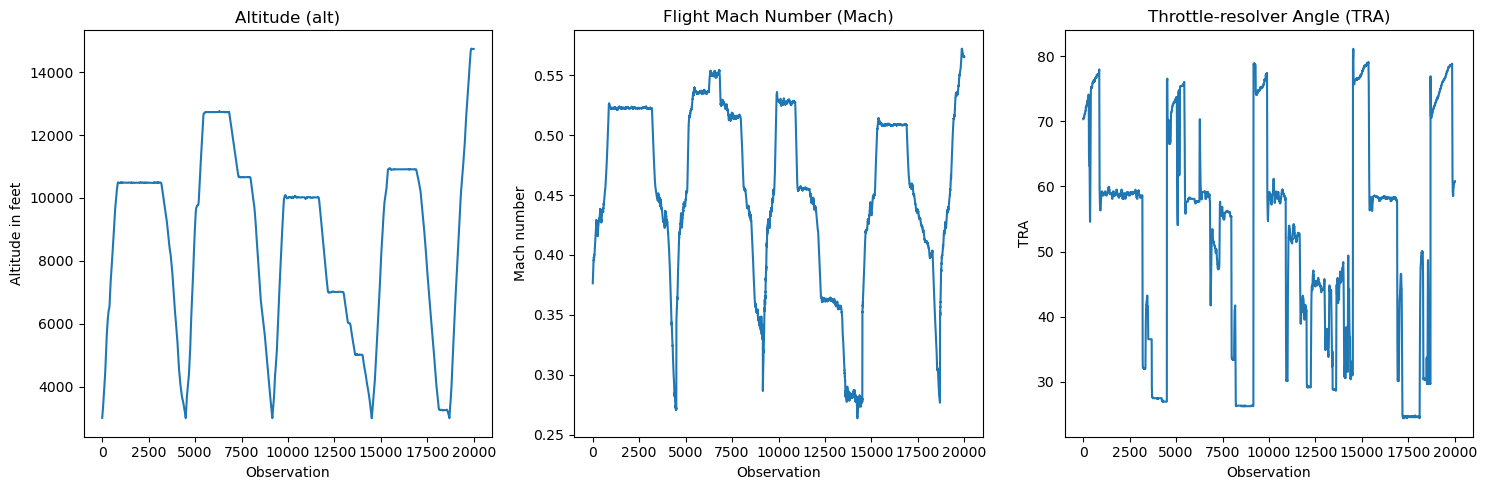

In [39]:
import matplotlib.pyplot as plt

# Sample code to plot 'alt', 'Mach', and 'TRA' from train_df
# Assuming train_df is already defined and contains these columns

plt.figure(figsize=(15, 5))

# Altitude plot
plt.subplot(1, 3, 1)
plt.plot(train_df['alt'][:20000])
plt.title('Altitude (alt)')
plt.xlabel('Observation')
plt.ylabel('Altitude in feet')

# Mach number plot
plt.subplot(1, 3, 2)
plt.plot(train_df['Mach'][:20000])
plt.title('Flight Mach Number (Mach)')
plt.xlabel('Observation')
plt.ylabel('Mach number')

# Throttle-resolver angle plot
plt.subplot(1, 3, 3)
plt.plot(train_df['TRA'][:20000])
plt.title('Throttle-resolver Angle (TRA)')
plt.xlabel('Observation')
plt.ylabel('TRA')

plt.tight_layout()
plt.show()



This Python script skillfully visualizes total temperature measurements (T2, T24, T30, T48, T50) from `train_df`, focusing on the first 20,000 observations. It's vital for analyzing temperature trends across different engine stages, playing a significant role in predictive maintenance and machine learning model development.

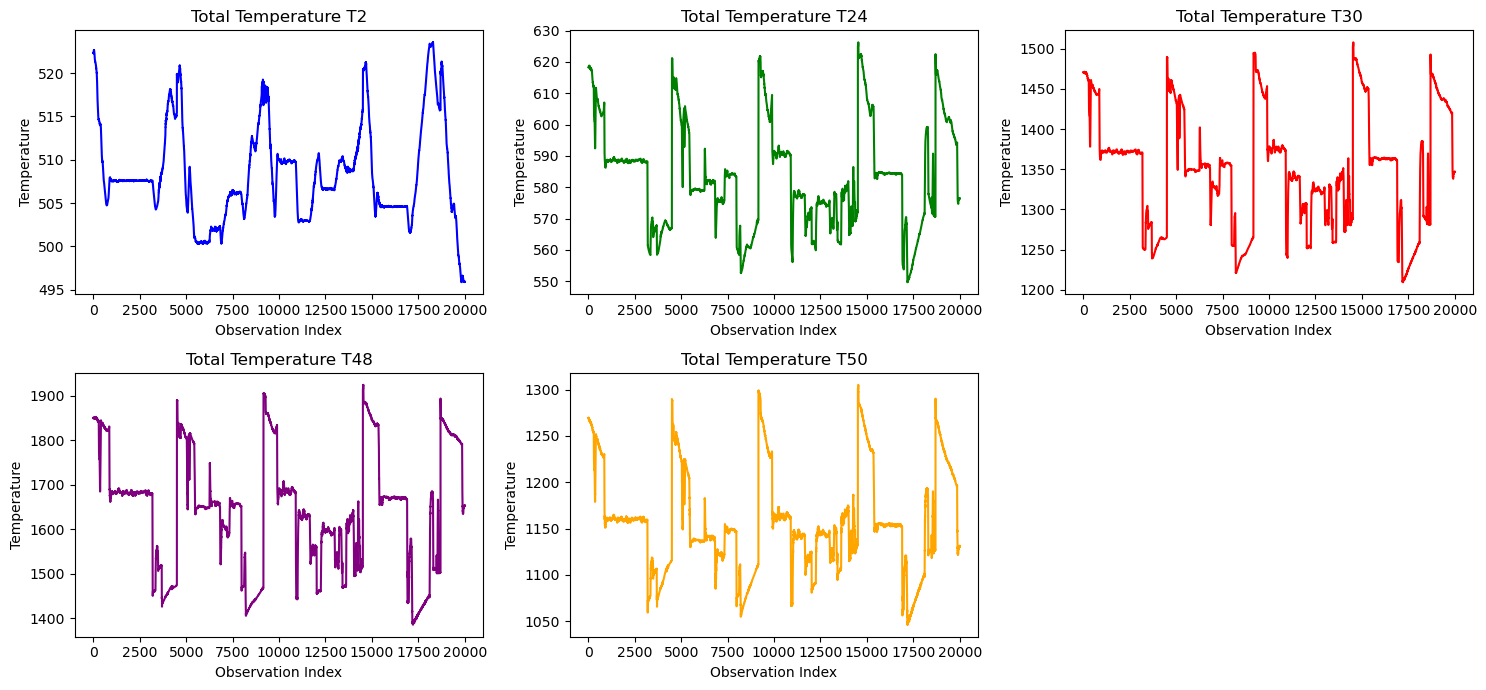

In [17]:
# Sample code to plot total temperature measurements from train_df
# This code assumes train_df is already defined and contains the temperature columns

plt.figure(figsize=(15, 7))

# Plot for T2
plt.subplot(2, 3, 1)
plt.plot(train_df['T2'][:20000], label='T2', color='blue')
plt.title('Total Temperature T2')
plt.xlabel('Observation Index')
plt.ylabel('Temperature')

# Plot for T24
plt.subplot(2, 3, 2)
plt.plot(train_df['T24'][:20000], label='T24', color='green')
plt.title('Total Temperature T24')
plt.xlabel('Observation Index')
plt.ylabel('Temperature')

# Plot for T30
plt.subplot(2, 3, 3)
plt.plot(train_df['T30'][:20000], label='T30', color='red')
plt.title('Total Temperature T30')
plt.xlabel('Observation Index')
plt.ylabel('Temperature')

# Plot for T48
plt.subplot(2, 3, 4)
plt.plot(train_df['T48'][:20000], label='T48', color='purple')
plt.title('Total Temperature T48')
plt.xlabel('Observation Index')
plt.ylabel('Temperature')

# Plot for T50
plt.subplot(2, 3, 5)
plt.plot(train_df['T50'][:20000], label='T50', color='orange')
plt.title('Total Temperature T50')
plt.xlabel('Observation Index')
plt.ylabel('Temperature')

plt.tight_layout()
plt.show()



This Python script effectively visualizes various total pressure measurements (P15, P2, P21, P24, Ps30, P40, P50) from `train_df` for the first 20,000 observations. It's essential for monitoring pressure trends in different engine stages, crucial in aircraft engine health assessment for predictive maintenance.

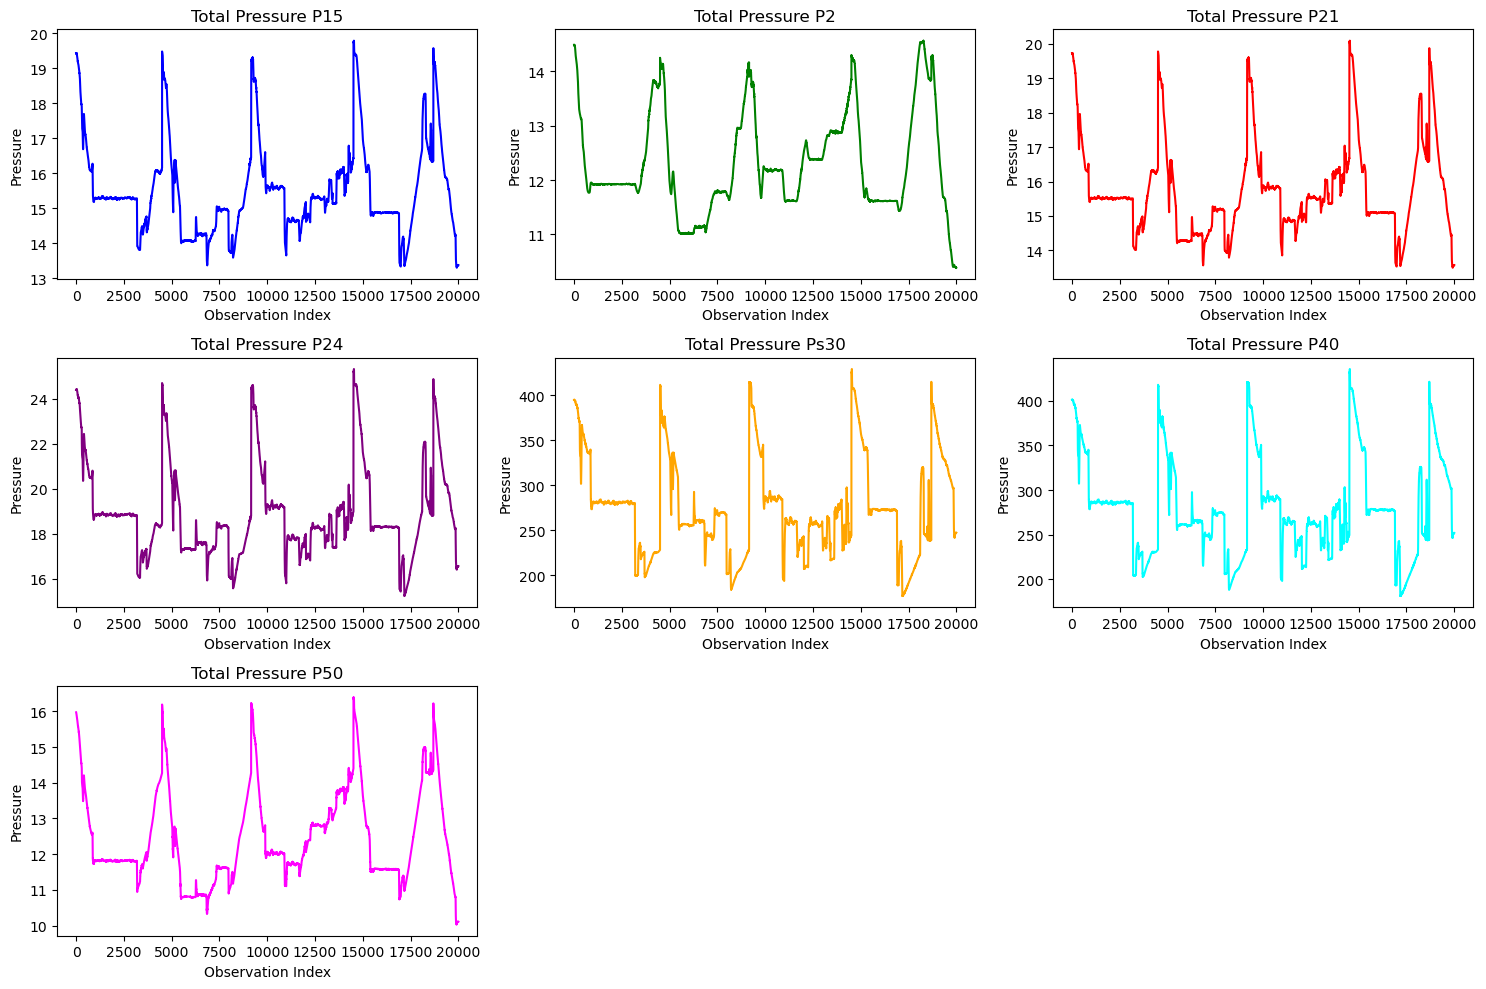

In [18]:
# Sample code to plot total pressure measurements from train_df
# This code assumes train_df is already defined and contains the pressure columns

plt.figure(figsize=(15, 10))

# Plot for P15
plt.subplot(3, 3, 1)
plt.plot(train_df['P15'][:20000], label='P15', color='blue')
plt.title('Total Pressure P15')
plt.xlabel('Observation Index')
plt.ylabel('Pressure')

# Plot for P2
plt.subplot(3, 3, 2)
plt.plot(train_df['P2'][:20000], label='P2', color='green')
plt.title('Total Pressure P2')
plt.xlabel('Observation Index')
plt.ylabel('Pressure')

# Plot for P21
plt.subplot(3, 3, 3)
plt.plot(train_df['P21'][:20000], label='P21', color='red')
plt.title('Total Pressure P21')
plt.xlabel('Observation Index')
plt.ylabel('Pressure')

# Plot for P24
plt.subplot(3, 3, 4)
plt.plot(train_df['P24'][:20000], label='P24', color='purple')
plt.title('Total Pressure P24')
plt.xlabel('Observation Index')
plt.ylabel('Pressure')

# Plot for Ps30
plt.subplot(3, 3, 5)
plt.plot(train_df['Ps30'][:20000], label='Ps30', color='orange')
plt.title('Total Pressure Ps30')
plt.xlabel('Observation Index')
plt.ylabel('Pressure')

# Plot for P40
plt.subplot(3, 3, 6)
plt.plot(train_df['P40'][:20000], label='P40', color='cyan')
plt.title('Total Pressure P40')
plt.xlabel('Observation Index')
plt.ylabel('Pressure')

# Plot for P50
plt.subplot(3, 3, 7)
plt.plot(train_df['P50'][:20000], label='P50', color='magenta')
plt.title('Total Pressure P50')
plt.xlabel('Observation Index')
plt.ylabel('Pressure')

plt.tight_layout()
plt.show()



This Python script visualizes key engine performance metrics (Nf for Physical Fan Speed, Nc for Corrected Core Speed, and Wf for Fuel Flow) from `train_df`, focusing on the first 20,000 observations. These plots are instrumental in assessing engine operational efficiency for predictive maintenance.

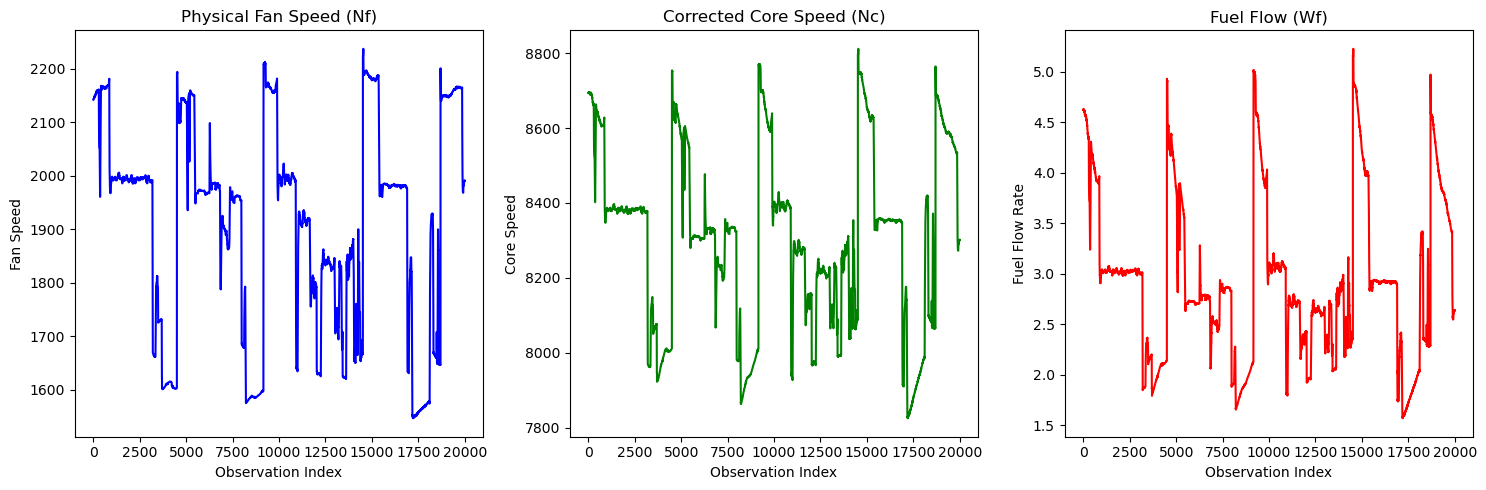

In [19]:
# Sample code to plot physical and corrected fan and core speeds, and fuel flow from train_df
# This code assumes train_df is already defined and contains the columns Nf, Nc, and Wf

plt.figure(figsize=(15, 5))

# Plot for Physical Fan Speed (Nf)
plt.subplot(1, 3, 1)
plt.plot(train_df['Nf'][:20000], label='Nf', color='blue')
plt.title('Physical Fan Speed (Nf)')
plt.xlabel('Observation Index')
plt.ylabel('Fan Speed')

# Plot for Corrected Core Speed (Nc)
plt.subplot(1, 3, 2)
plt.plot(train_df['Nc'][:20000], label='Nc', color='green')
plt.title('Corrected Core Speed (Nc)')
plt.xlabel('Observation Index')
plt.ylabel('Core Speed')

# Plot for Fuel Flow (Wf)
plt.subplot(1, 3, 3)
plt.plot(train_df['Wf'][:20000], label='Wf', color='red')
plt.title('Fuel Flow (Wf)')
plt.xlabel('Observation Index')
plt.ylabel('Fuel Flow Rate')

plt.tight_layout()
plt.show()



This Python script plots various engine flow measurements (W21, W22, W25, W31, W32, W48, W50) from `train_df` for the first 20,000 observations. It's crucial for analyzing flow rates, a key aspect in engine health monitoring for predictive maintenance.

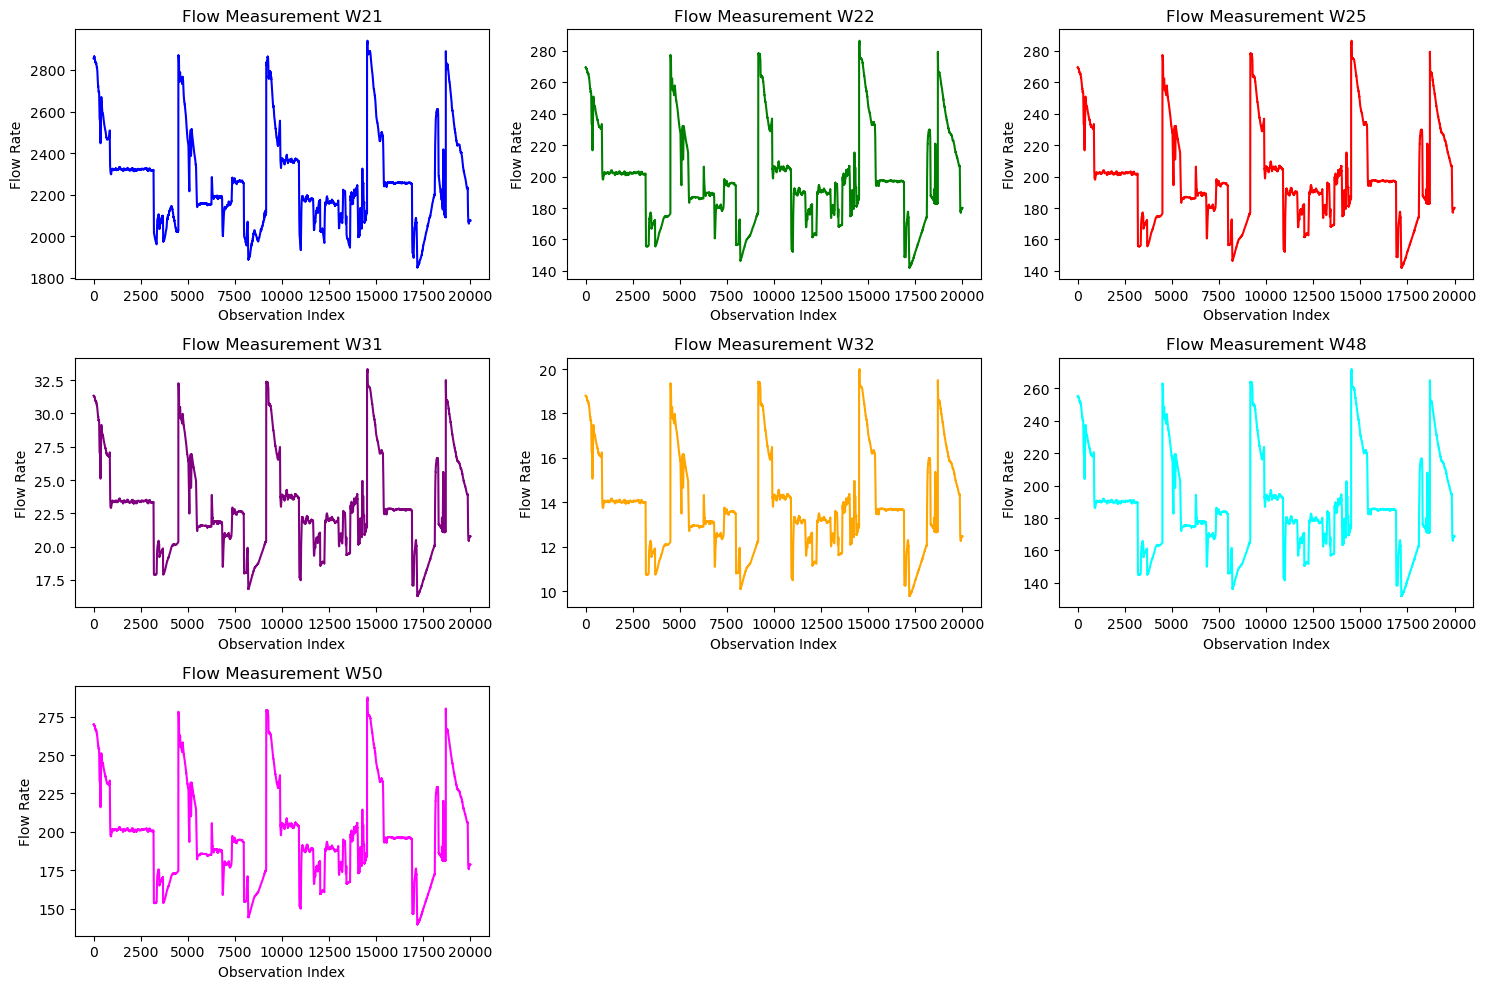

In [20]:
# Sample code to plot various flow measurements from train_df
# This code assumes train_df is already defined and contains the flow measurement columns

plt.figure(figsize=(15, 10))

# Plot for W21
plt.subplot(3, 3, 1)
plt.plot(train_df['W21'][:20000], label='W21', color='blue')
plt.title('Flow Measurement W21')
plt.xlabel('Observation Index')
plt.ylabel('Flow Rate')

# Plot for W22
plt.subplot(3, 3, 2)
plt.plot(train_df['W22'][:20000], label='W22', color='green')
plt.title('Flow Measurement W22')
plt.xlabel('Observation Index')
plt.ylabel('Flow Rate')

# Plot for W25
plt.subplot(3, 3, 3)
plt.plot(train_df['W25'][:20000], label='W25', color='red')
plt.title('Flow Measurement W25')
plt.xlabel('Observation Index')
plt.ylabel('Flow Rate')

# Plot for W31
plt.subplot(3, 3, 4)
plt.plot(train_df['W31'][:20000], label='W31', color='purple')
plt.title('Flow Measurement W31')
plt.xlabel('Observation Index')
plt.ylabel('Flow Rate')

# Plot for W32
plt.subplot(3, 3, 5)
plt.plot(train_df['W32'][:20000], label='W32', color='orange')
plt.title('Flow Measurement W32')
plt.xlabel('Observation Index')
plt.ylabel('Flow Rate')

# Plot for W48
plt.subplot(3, 3, 6)
plt.plot(train_df['W48'][:20000], label='W48', color='cyan')
plt.title('Flow Measurement W48')
plt.xlabel('Observation Index')
plt.ylabel('Flow Rate')

# Plot for W50
plt.subplot(3, 3, 7)
plt.plot(train_df['W50'][:20000], label='W50', color='magenta')
plt.title('Flow Measurement W50')
plt.xlabel('Observation Index')
plt.ylabel('Flow Rate')

plt.tight_layout()
plt.show()



This script visualizes stall margins (SmFan, SmLPC, SmHPC) from the `train_df` DataFrame, highlighting engine safety margins using line plots for the first 20,000 observations. Essential for assessing engine operational safety in predictive maintenance.

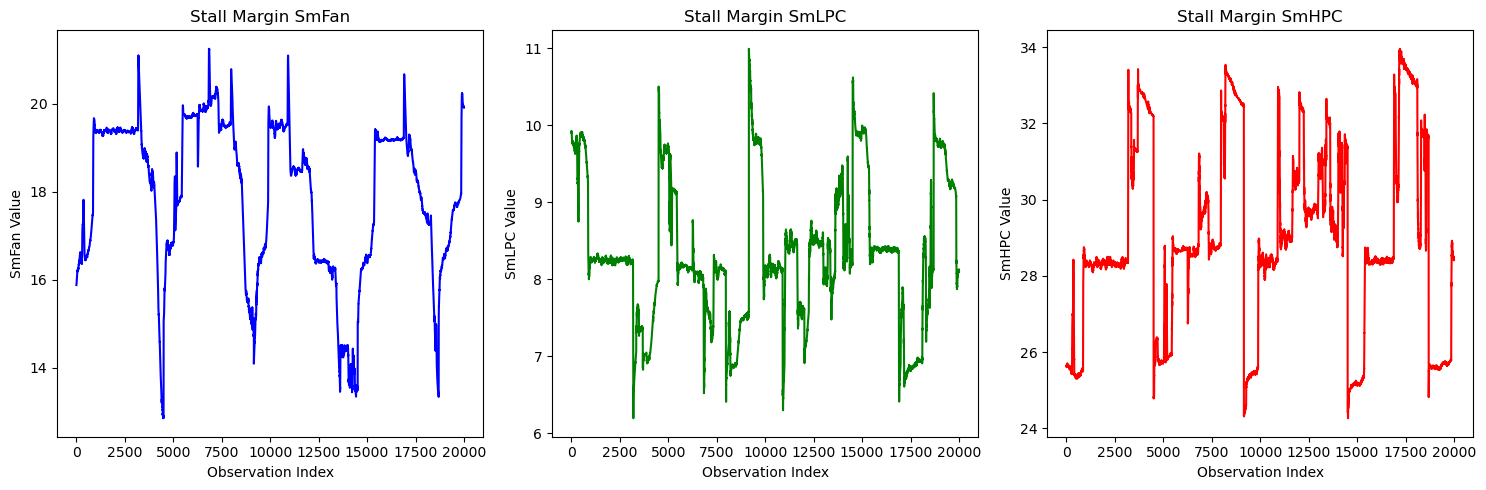

In [21]:
# Sample code to plot stall margins (SmFan, SmLPC, SmHPC) from train_df
# This code assumes train_df is already defined and contains the stall margin columns

plt.figure(figsize=(15, 5))

# Plot for SmFan
plt.subplot(1, 3, 1)
plt.plot(train_df['SmFan'][:20000], label='SmFan', color='blue')
plt.title('Stall Margin SmFan')
plt.xlabel('Observation Index')
plt.ylabel('SmFan Value')

# Plot for SmLPC
plt.subplot(1, 3, 2)
plt.plot(train_df['SmLPC'][:20000], label='SmLPC', color='green')
plt.title('Stall Margin SmLPC')
plt.xlabel('Observation Index')
plt.ylabel('SmLPC Value')

# Plot for SmHPC
plt.subplot(1, 3, 3)
plt.plot(train_df['SmHPC'][:20000], label='SmHPC', color='red')
plt.title('Stall Margin SmHPC')
plt.xlabel('Observation Index')
plt.ylabel('SmHPC Value')

plt.tight_layout()
plt.show()



This Python script visualizes efficiency and flow modifiers in `train_df`, including fan, LPC, and HPC efficiency modifiers, using line plots to reveal operational trends and variations. It's vital for understanding component performance in predictive maintenance.

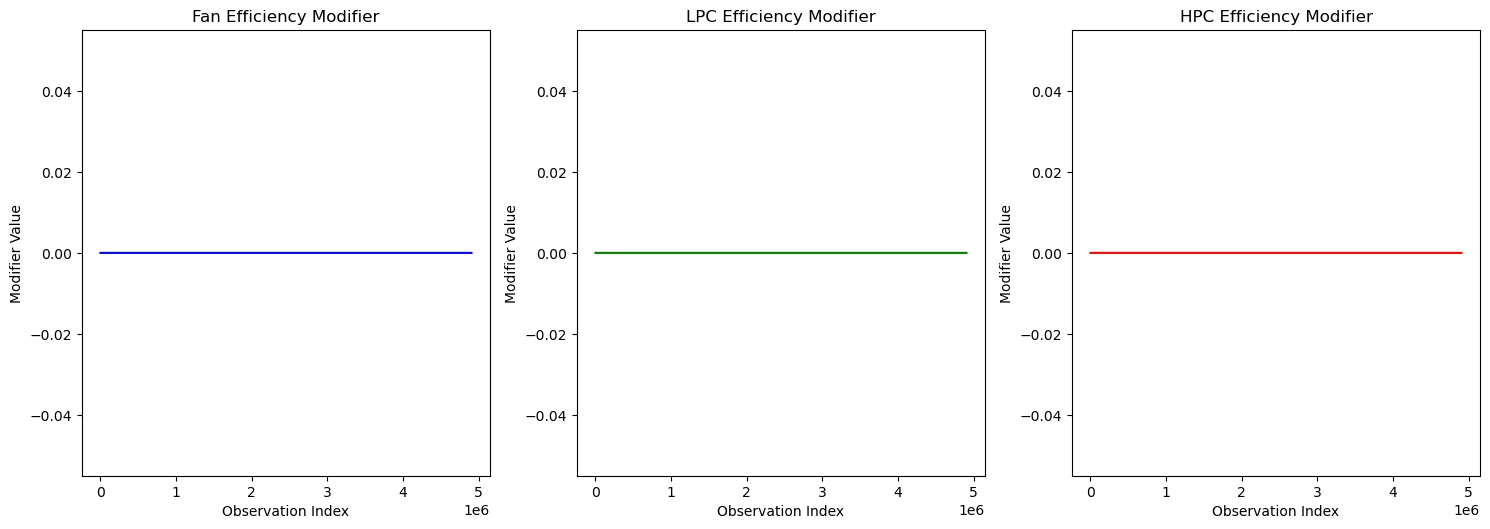

In [22]:
# Sample code to plot efficiency and flow modifiers from train_df
# This code assumes train_df is already defined and contains the efficiency and flow modifier columns

plt.figure(figsize=(15, 10))

# Plot for Fan Efficiency Modifier (fan_eff_mod)
plt.subplot(2, 3, 1)
plt.plot(train_df['fan_eff_mod'], label='fan_eff_mod', color='blue')
plt.title('Fan Efficiency Modifier')
plt.xlabel('Observation Index')
plt.ylabel('Modifier Value')

# Plot for LPC Efficiency Modifier (LPC_eff_mod)
plt.subplot(2, 3, 2)
plt.plot(train_df['LPC_eff_mod'], label='LPC_eff_mod', color='green')
plt.title('LPC Efficiency Modifier')
plt.xlabel('Observation Index')
plt.ylabel('Modifier Value')

# Plot for HPC Efficiency Modifier (HPC_eff_mod)
plt.subplot(2, 3, 3)
plt.plot(train_df['HPC_eff_mod'], label='HPC_eff_mod', color='red')
plt.title('HPC Efficiency Modifier')
plt.xlabel('Observation Index')
plt.ylabel('Modifier Value')

# Additional plots for other efficiency and flow modifiers can be added here
# For example, LPC_flow_mod, HPC_flow_mod, etc.

plt.tight_layout()
plt.show()



The Python script plots the Remaining Useful Life (RUL) from `train_df`, enhanced with average, median lines, and a critical point marker, offering a detailed view of engine health trends.

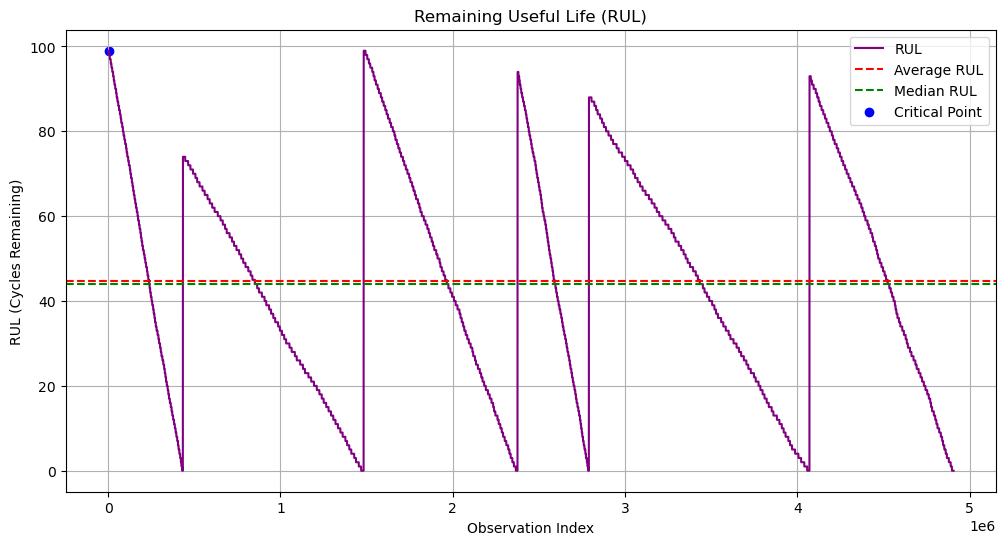

In [23]:
# Sample code to plot the target variable Remaining Useful Life (RUL) from train_df
# Assuming train_df is already defined and contains the RUL column

plt.figure(figsize=(12, 6))

# Plot for Remaining Useful Life (RUL)
plt.plot(train_df['RUL'], label='RUL', color='purple')
plt.title('Remaining Useful Life (RUL)')
plt.xlabel('Observation Index')
plt.ylabel('RUL (Cycles Remaining)')
plt.grid(True)

# Adding more details for better understanding
plt.axhline(y=train_df['RUL'].mean(), color='red', linestyle='--', label='Average RUL')
plt.axhline(y=train_df['RUL'].median(), color='green', linestyle='--', label='Median RUL')
plt.legend()

# Highlighting the point where RUL starts to decrease rapidly
critical_point = np.argmin(np.gradient(train_df['RUL']))
plt.scatter(critical_point, train_df['RUL'][critical_point], color='blue', label='Critical Point')
plt.legend()

plt.show()



 drop the constant feature columns from train_df and test_df

#### Preparing Feature Matrix (X) and Target Vector (y), and Normalizing Features

This code separates the features and the target variable from train_df, and then applies Min-Max normalization to scale the feature values between -1 and 1. Normalizing the features is a crucial step in many machine learning algorithms to ensure that all features contribute equally to the model training process.

In [22]:
# Filtering train_df for only unit 5
train_df_sub = train_df[:300000]
test_df_sub = test_df[:100000]
print(train_df_sub.shape)
print(test_df_sub.shape)


(300000, 19)
(100000, 19)


In [17]:

from sklearn.preprocessing import MinMaxScaler

# Separating features and target variable
X = train_df_sub.drop('RUL', axis=1)
y = train_df_sub['RUL']

# Normalizing features with MinMaxScaler to scale between -1 and 1
scaler = MinMaxScaler(feature_range=(-1, 1))
X_normalized = scaler.fit_transform(X)

# X_normalized now contains the normalized features


### Training and Modeling with Feed-Forward Neural Network (FNN) for RUL Estimation
Implemented a five-layer FNN for RUL prediction, trained over 100 epochs with real-time monitoring of training and validation loss. This approach emphasizes overfitting prevention and hyperparameter tuning, ensuring effective learning and generalization, crucial in predictive maintenance within aerospace engineering \
\
Implemented FNN model as per specifications in the paper:
Fusing physics-based and deep learning models for prognosticsn'.
Availablehttps://www.sciencedirect.com/science/article/pii/S0951832021004725?via%3Dihub2""".

In [42]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
# Assuming the number of features (n) in the input space x is already known
n_features = X.shape[1]  # Replace with the actual number of features if not using X from earlier steps

# Build the model
model = Sequential([
    Dense(200, input_dim=n_features, activation='relu'),  # Input layer with n nodes and first hidden layer with 200 neurons
    Dense(200, activation='relu'),  # Second hidden layer with 200 neurons
    Dense(200, activation='relu'),  # Third hidden layer with 200 neurons
    Dense(50, activation='relu'),   # Fourth hidden layer with 50 neurons
    Dense(1, activation='linear')   # Output layer with a single neuron (linear activation for regression)
])


def root_mean_squared_error(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss=root_mean_squared_error)

# Summary of the model
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 200)               3800      
                                                                 
 dense_11 (Dense)            (None, 200)               40200     
                                                                 
 dense_12 (Dense)            (None, 200)               40200     
                                                                 
 dense_13 (Dense)            (None, 50)                10050     
                                                                 
 dense_14 (Dense)            (None, 1)                 51        
                                                                 
Total params: 94,301
Trainable params: 94,301
Non-trainable params: 0
_________________________________________________________________


This code trains the model on the normalized features X_normalized and target y for 100 epochs, with a batch size of 32. We use 20% of the training data as a validation set to monitor the model's performance on unseen data during training

In [48]:
# Define training parameters
epochs = 20  # Number of epochs to train
batch_size = 64  # Batch size for training

# Calculate the split index for 80% training and 20% validation
# split_index = int(len(X_normalized) * 0.3)

split_index = 4069786

# Split the data into training and validation sets
X_train, X_val = X_normalized[:split_index], X_normalized[split_index:]
y_train, y_val = y[:split_index], y[split_index:]


# Train the model with the specified training and validation sets
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))


Epoch 1/20
63591/63591 [==============================] - 1105s 17ms/step - loss: 9.3659 - val_loss: 6.2662
Epoch 2/20
63591/63591 [==============================] - 1019s 16ms/step - loss: 8.6108 - val_loss: 5.7537
Epoch 3/20
63591/63591 [==============================] - 932s 15ms/step - loss: 8.4706 - val_loss: 6.5093
Epoch 4/20
63591/63591 [==============================] - 952s 15ms/step - loss: 8.3453 - val_loss: 6.1842
Epoch 5/20
63591/63591 [==============================] - 1143s 18ms/step - loss: 8.2231 - val_loss: 6.2551
Epoch 6/20
63591/63591 [==============================] - 990s 16ms/step - loss: 8.1023 - val_loss: 5.8068
Epoch 7/20
63591/63591 [==============================] - 968s 15ms/step - loss: 7.9830 - val_loss: 6.1599
Epoch 8/20
63591/63591 [==============================] - 1028s 16ms/step - loss: 7.8715 - val_loss: 5.8911
Epoch 9/20
63591/63591 [==============================] - 1004s 16ms/step - loss: 7.7844 - val_loss: 6.4492
Epoch 10/20
63591/63591 [=======

This script generates a plot showing the training and validation loss over each epoch, which is crucial for diagnosing issues like overfitting or underfitting. The goal is to have both training and validation loss decrease and then plateau, indicating that the model is learning effectively and generalizing well to new data

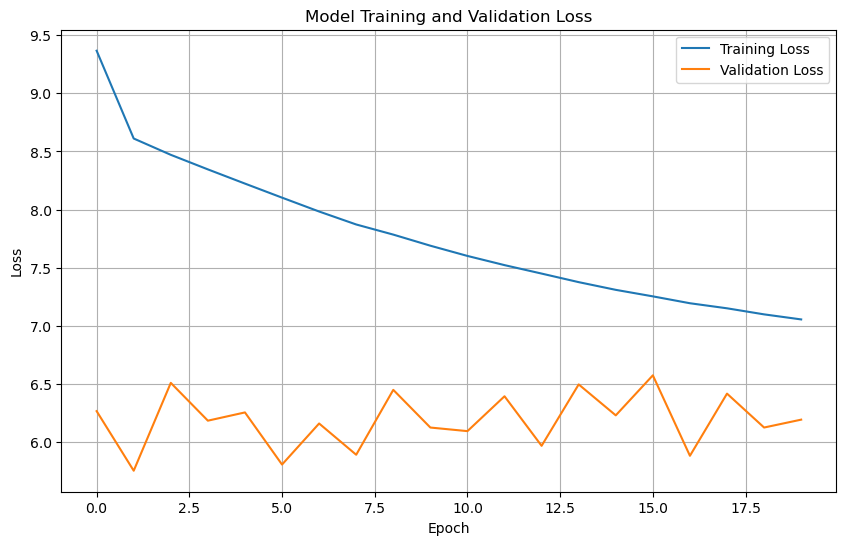

In [49]:
import matplotlib.pyplot as plt

# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


The code normalizes test data using MinMaxScaler, predicts 'RUL' with a neural network model, and plots these predictions against actual values, offering a visual comparison of performance.

85476/85476 [==============================] - 682s 8ms/step


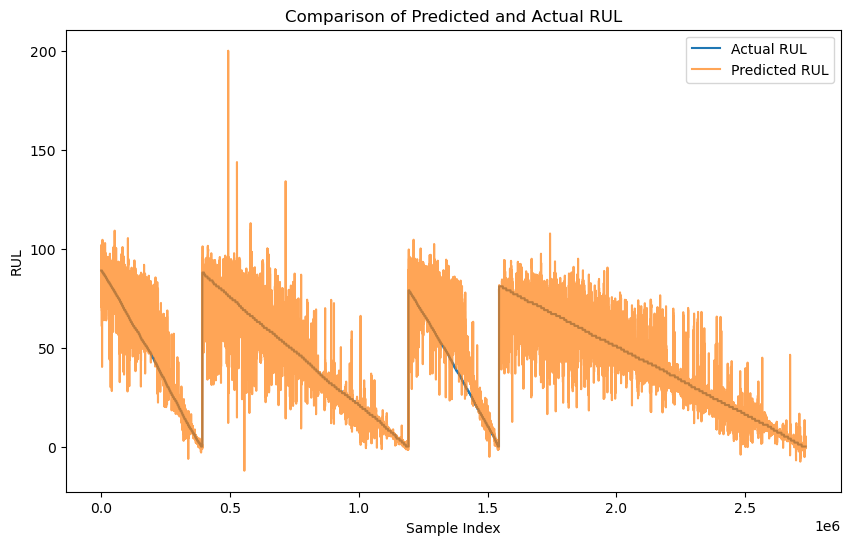

In [50]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Assuming scaler is the MinMaxScaler instance used for training data
# and model is the trained neural network model

# Normalize the test data
test_df_normalized = scaler.transform(test_df_sub.drop(columns=['RUL']))

# Predict RUL
predicted_RUL = model.predict(test_df_normalized)

# Plotting Predicted vs Actual RUL
plt.figure(figsize=(10, 6))
plt.plot(test_df_sub['RUL'], label='Actual RUL')
plt.plot(predicted_RUL, label='Predicted RUL', alpha=0.7)
plt.title('Comparison of Predicted and Actual RUL')
plt.xlabel('Sample Index')
plt.ylabel('RUL')
plt.legend()
plt.show()


### Alternative Model
The provided code demonstrates building and compiling a deep learning model using TensorFlow and Keras. The model architecture follows the MLP-LSTM-MLP design, featuring multiple Dense layers with 'tanh' activation, a reshaping layer for LSTM compatibility, an LSTM layer with 60 cells, and a linear output for regression. The model employs a custom RMSE loss function and is suited for time-series prediction tasks.
The provided code demonstrates building and compiling a deep learning model using TensorFlow and Keras. The model architecture follows the MLP-LSTM-MLP design, featuring multiple Dense layers with 'tanh' activation, a reshaping layer for LSTM compatibility, an LSTM layer with 60 cells, and a linear output for regression. The model employs a custom RMSE loss function and is suited for time-series prediction tasks.The provided code demonstrates building and compiling a deep learning model using TensorFlow and Keras. The model architecture follows the MLP-LSTM-MLP design, featuring multiple Dense layers with 'tanh' activation, a reshaping layer for LSTM compatibility, an LSTM layer with 60 cells, and a linear output for regression. The model employs a custom RMSE loss function and is suited for time-series prediction tasks.The provided code demonstrates building and compiling a deep learning model using TensorFlow and Keras. The model architecture follows the MLP-LSTM-MLP design, featuring multiple Dense layers with 'tanh' activation, a reshaping layer for LSTM compatibility, an LSTM layer with 60 cells, and a linear output for regression. The model employs a custom RMSE loss function and is suited for time-series prediction tasks.

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Reshape

# Assuming the number of features (n) in the input space x is already known
n_features = X.shape[1]  # Replace with the actual number of features if not using X from earlier steps

# Build the model
model_2 = Sequential([
    Dense(100, input_dim=n_features, activation='tanh'),  # Input layer with n nodes and first hidden layer with 100 neurons
    Dense(50, activation='tanh'),  # Second hidden layer with 50 neurons
    Dense(50, activation='tanh'),  # Third hidden layer with 50 neurons
    
    Reshape((5, -1)),  # Reshaping data for LSTM layer, assuming 5 timesteps
    LSTM(60, activation='relu', return_sequences=False),  # LSTM layer with 60 cells
    
    Dense(60, activation='tanh'),  # MLP layer after LSTM with 60 neurons
    Dense(30, activation='tanh'),  # MLP layer with 30 neurons
    Dense(1, activation='linear')   # Output layer with a single neuron (linear activation for regression)
])

# Custom RMSE loss function
def root_mean_squared_error(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))

# Compile the model
model_2.compile(optimizer='adam', loss=root_mean_squared_error)

# Summary of the model
model_2.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 100)               1900      
                                                                 
 dense_19 (Dense)            (None, 50)                5050      
                                                                 
 dense_20 (Dense)            (None, 50)                2550      
                                                                 
 reshape_3 (Reshape)         (None, 5, 10)             0         
                                                                 
 lstm_3 (LSTM)               (None, 60)                17040     
                                                                 
 dense_21 (Dense)            (None, 60)                3660      
                                                                 
 dense_22 (Dense)            (None, 30)               

In [19]:
# Define training parameters
epochs = 10  # Number of epochs to train
batch_size = 64  # Batch size for training

# Calculate the split index for 80% training and 20% validation
split_index = int(len(X_normalized) * 0.7)

# split_index = 2375466

# Split the data into training and validation sets
X_train, X_val = X_normalized[:split_index], X_normalized[split_index:]
y_train, y_val = y[:split_index], y[split_index:]


# Train the model with the specified training and validation sets
history_2 = model_2.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))


Epoch 1/10
3282/3282 [==============================] - 139s 41ms/step - loss: 30.7661 - val_loss: 35.6173
Epoch 2/10
3282/3282 [==============================] - 147s 45ms/step - loss: 14.1124 - val_loss: 35.6489
Epoch 3/10
3282/3282 [==============================] - 131s 40ms/step - loss: 14.1126 - val_loss: 35.6460
Epoch 4/10
3282/3282 [==============================] - 138s 42ms/step - loss: 14.1132 - val_loss: 35.5717
Epoch 5/10
3282/3282 [==============================] - 136s 41ms/step - loss: 14.1131 - val_loss: 35.7372
Epoch 6/10
3282/3282 [==============================] - 286s 87ms/step - loss: 14.1127 - val_loss: 35.7036
Epoch 7/10
3282/3282 [==============================] - 133s 40ms/step - loss: 14.1138 - val_loss: 35.6240
Epoch 8/10
3282/3282 [==============================] - 152s 46ms/step - loss: 14.1146 - val_loss: 35.7713
Epoch 9/10
3282/3282 [==============================] - 150s 46ms/step - loss: 14.1125 - val_loss: 35.7046
Epoch 10/10
3282/3282 [==============

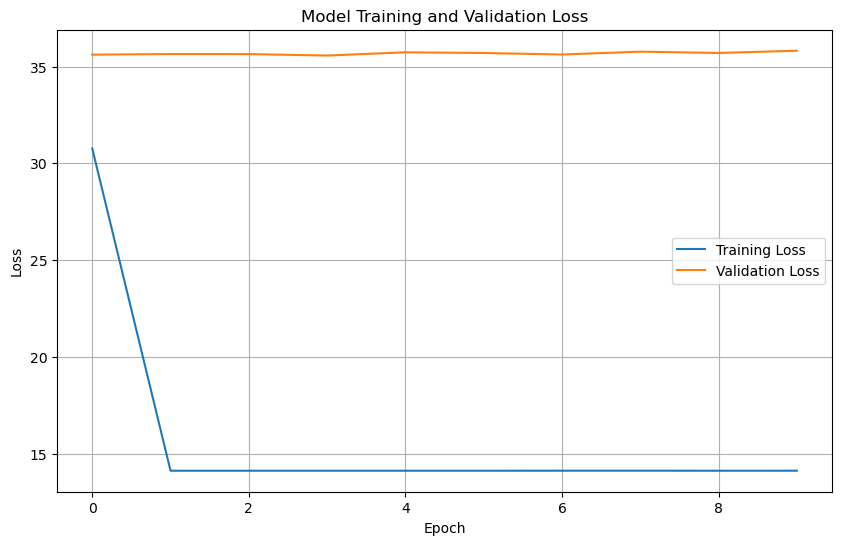

In [20]:
import matplotlib.pyplot as plt

# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history_2.history['loss'], label='Training Loss')
plt.plot(history_2.history['val_loss'], label='Validation Loss')
plt.title('Model Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


3125/3125 [==============================] - 50s 16ms/step


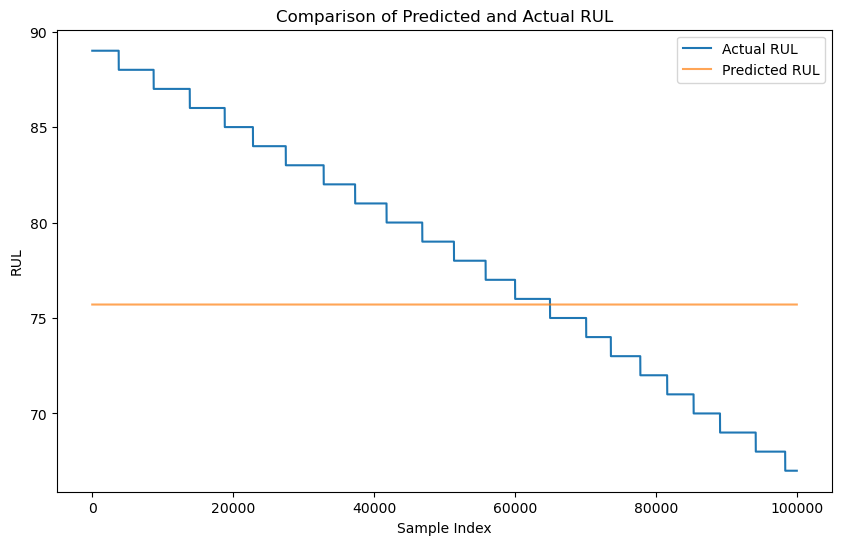

In [23]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Assuming scaler is the MinMaxScaler instance used for training data
# and model is the trained neural network model

# Normalize the test data
test_df_normalized = scaler.transform(test_df_sub.drop(columns=['RUL']))

# Predict RUL
predicted_RUL = model_2.predict(test_df_normalized)

# Plotting Predicted vs Actual RUL
plt.figure(figsize=(10, 6))
plt.plot(test_df_sub['RUL'], label='Actual RUL')
plt.plot(predicted_RUL, label='Predicted RUL', alpha=0.7)
plt.title('Comparison of Predicted and Actual RUL')
plt.xlabel('Sample Index')
plt.ylabel('RUL')
plt.legend()
plt.show()


In [ ]:
#stats.shapiro(df['sensor_column'])  # 


In [ ]:
# correlation_matrix = df.corr()
# sns.heatmap(correlation_matrix, annot=True)
# plt.show()


In [ ]:
# sns.histplot(df['sensor_column'], kde=True)
# plt.show()


In [ ]:
# plt.plot(df['time_column'], df['sensor_column'])  # 
# plt.show()


In [ ]:
# sns.boxplot(data=df['sensor_column'])
# plt.show()


In [ ]:
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# plot_acf(df['sensor_column'])
# plot_pacf(df['sensor_column'])
# plt.show()
